# Description



## Load CSV Data

In [5]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


path_results = ""

simulations = [
    "BernoulliNB_SMSSpam_resultados",
]

all_logs = []

def load_data():
    for s in simulations:
        # df = pd.read_csv('{}/{}.csv'.format(path_results, s), sep=',')
        df = pd.read_csv('{}.csv'.format( s), sep=',')
        all_logs.append(df)


In [6]:
load_data()
all_logs = pd.concat(all_logs)

# Tabular Data

## One plot per base model

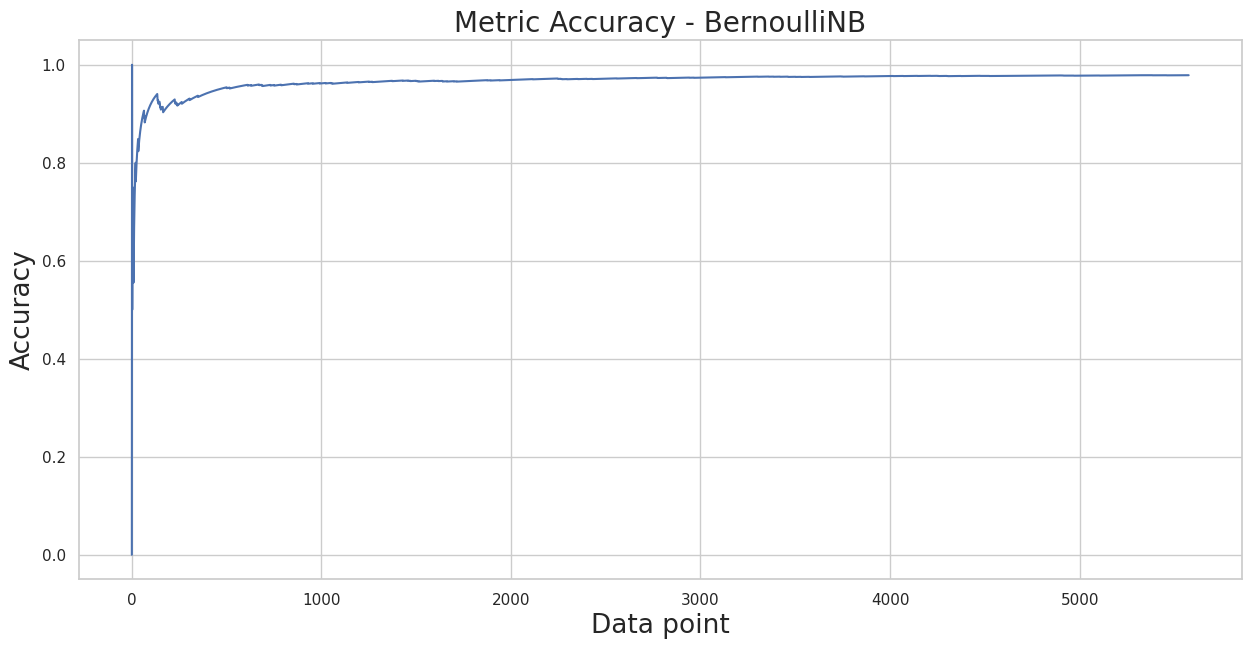

In [19]:
# # This code plots one plot per Algorithm
import seaborn as sns
from matplotlib.ticker import PercentFormatter

algs = all_logs['Algorithm'].unique()
for alg in algs:

    dataframe = all_logs[all_logs['Algorithm'] == alg]

    plt.figure(figsize=(15, 7))
    sns.set(font_scale=1, style="whitegrid")

    g = sns.lineplot(
        data=dataframe,
        x="Round",
        y='Accuracy',
        markers=False,
        dashes=False,

    )

    g.set_xlabel("Data point", fontsize = 19)
    g.set_ylabel("Accuracy", fontsize = 19)
    plt.title("Metric Accuracy - {}".format(alg), fontsize=20)

# All Models used by Ensemble

Algorithm
RandomOverSampler         5270
HardSamplingClassifier     284
LogisticRegression          10
BernoulliNB                  9
RandomSampler                2
Name: count, dtype: int64


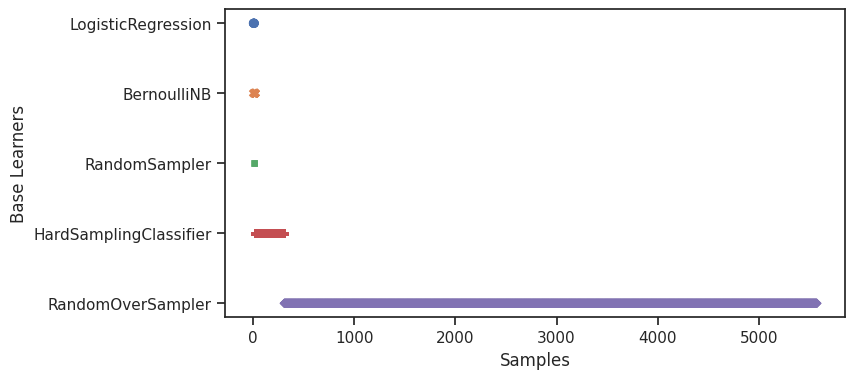

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


ensemble_df = pd.read_csv(
    'csv_criado_sms/methods_csv_criado_sms/ensemble_best_model_SMSSpam_resultados.csv', sep=',')

plt.figure(figsize=(8, 4))
sns.set(font_scale=1, style="ticks")
ax = sns.scatterplot(
    data=ensemble_df,
    x="Round",
    y="Algorithm",
    hue="Algorithm",
    style="Algorithm",
    # sizes=(6, 10),
    color=".1",
    marker="+",
    legend=False
)
plt.legend([],[], frameon=False)
# plt.title('Example Plot')

plt.xlabel('Data Points')
plt.ylabel('Base Learners')
print(ensemble_df['Algorithm'].value_counts())


## All base model's Metrics in one plot
Take care when using large datasets because this function takes long time.

Text(0, 0.5, 'Rolling MAE')

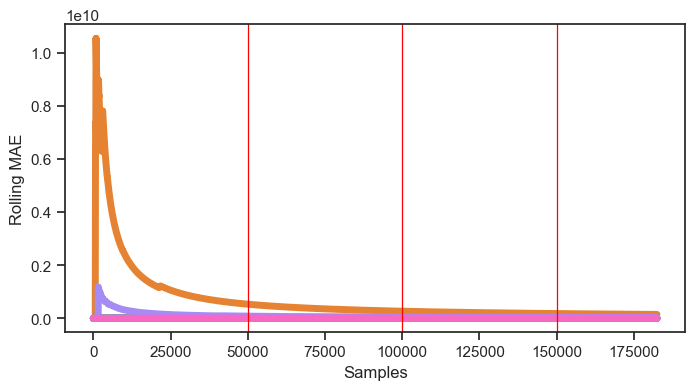

In [6]:
# This code plots one plot per Algorithm
import seaborn as sns
from matplotlib.ticker import PercentFormatter
# sns.set_style("whitegrid")
sns.set_style("ticks")
# all_logs['R2'] = np.where(all_logs['R2'] < 0, 0, all_logs['R2'])
# all_logs['R2'] = all_logs['R2'].clip(lower=0)

# temp_date = all_logs
# temp_date['MAE'] = temp_date['MAE'].clip(lower=0, upper=3)
# temp_date = temp_date[(temp_date['Algorithm'] == 'KNN Regression') |
#                     #   (temp_date['Algorithm'] == 'HAT Regression') |
#                     #   (temp_date['Algorithm'] == 'HT Regression') |
#                       (temp_date['Algorithm'] == 'SGT')|
#                       (temp_date['Algorithm'] == 'SRP')
#                       ]
# temp_date = temp_date[(temp_date['Round'] < 200000) &(temp_date['Round'] > 20000)]
# temp_date2 = temp_date[temp_date['Algorithm'] == 'Logistic Regression']

# SGT                       638254
# SRP                       154691
# HT Regression             142688
# HAT Regression             62819
# Adaptive Random Forest       568
# KNN Regression               142
# Bagging                      103
# EWA                           28
# Linear Regression              2


plt.figure(figsize=(8, 4))
# sns.set(font_scale=1, style="white")

# g = sns.lineplot(
#     data=temp_date2,
#     x="Round",
#     y='MAE',
#     hue="Algorithm",
#     markers=True,
#     dashes=False,
#     estimator=None,
#     lw=4,
#     legend=False,
#     sizes=(.25, 2.5),
# )
# graph = sns.lineplot(
#     data=temp_date,
#     x="Round",
#     y='Rolling_MAE',
#     hue="Algorithm",
#     markers=True,
#     dashes=False,
#     estimator=None,
#     lw=0.2,
#     legend=True,
# )

graph = sns.lineplot(
    data=all_logs,
    x="Round",
    y='MAE',
    hue="Algorithm",
    markers=True,
    dashes=True,
    estimator=None,
    lw=5,
    legend=False,
)



graph.axvline(50000, color='red', linewidth=0.9)
graph.axvline(100000, color='red', linewidth=0.9)
graph.axvline(150000, color='red', linewidth=0.9)

plt.xlabel('Samples')
plt.ylabel('Rolling MAE')
# plt.legend(loc='upper left', labels=[
        #    'LogR MAE', 'KNN-R Rolling MAE', 'HAT-T Rolling MAE', 'HT-R Rolling MAE', 'LogR Rolling MAE'])
# sns.despine(offset=-100, trim=False)